**GRIP @ The Sparks Foundation**

**Data Science & Business Analytics: Exploratory Data Analysis - Retail**

**By: Shiva Allala** 

Firstly Importing neccassary pyhton packages and read the dataset

In [1]:
%load_ext google.colab.data_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('SampleSuperstore.csv')


**DATA EXPLORATION**

In [2]:
print(df['Country'].value_counts())
df.drop('Country', inplace=True, axis=1) # WE DROP THE COUNTRY COLUMN SINCE IT ONLY CONSISTS OF UNITED STATES

United States    9994
Name: Country, dtype: int64


Dropped the country column since it only consists of the Value United States

In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB
None
(9994, 12)


In [4]:
df['Cost']=df['Sales']-df['Profit']
df['Sales'] = df['Sales'].round(decimals = 2)
df['Profit'] = df['Profit'].round(decimals = 2)
df['Cost']=df['Sales']-df['Profit']
df['Cost'] = df['Cost'].round(decimals = 2)
df

Output hidden; open in https://colab.research.google.com to view.

Added the column Cost for perspective and rounded the sales,profit, and cost columns for readability

In [5]:
# CHECKING THE NUMBER OF UNIQUE VALUES FOR EACH COLUMN
print(df['Quantity'].value_counts())
print(df['Region'].value_counts())
print(df['City'].value_counts())
print(df['Segment'].value_counts())
print(df['Ship Mode'].value_counts())
print(df['State'].value_counts())
print(df['Postal Code'].value_counts())
print(df['Category'].value_counts())
print(df['Sub-Category'].value_counts())
print(df['Discount'].value_counts())

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64
West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Manhattan           1
Whittier            1
Jefferson City      1
Citrus Heights      1
Port Orange         1
Name: City, Length: 531, dtype: int64
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Mich

In [6]:
Loss = df[df['Profit'] < 0]
Loss

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03,1340.61
14,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.81,5,0.80,-123.86,192.67
15,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.54,3,0.80,-3.82,6.36
23,Second Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.37,2,0.30,-1.02,72.39
27,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.43,7,0.50,-1665.05,4748.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,77803,Central,Office Supplies,Binders,22.39,7,0.80,-35.82,58.21
9921,Standard Class,Home Office,Akron,Ohio,44312,East,Office Supplies,Binders,5.74,3,0.70,-4.59,10.33
9931,Standard Class,Consumer,San Bernardino,California,92404,West,Furniture,Bookcases,683.33,4,0.15,-40.20,723.53
9937,Second Class,Corporate,Los Angeles,California,90049,West,Furniture,Tables,71.09,2,0.20,-1.78,72.87


In [9]:
print(df.groupby('Ship Mode')['Profit'].sum())    # STANDARD CLASS HAS THE HIGHEST PROFIT, WHILE SAME DAY HAS VERY LOW PROFIT.
print(df.groupby('Segment')['Profit'].sum())      # CONSUMER HAS THE HIGHEST PROFIT
print(df.groupby('Region')['Profit'].sum())       # WEST HAS THE HIGHEST PROFIT
print(df.groupby('State')['Profit'].sum())        # (CALIFORNIA, NEW YORK, WASHINGTON) HAVE VERY HIGH PROFITS, WHILE (TEXAS,PENN, OHIO,NC,ILLSNOIS,COLORADO)HAVE HIGH LOSSES
print(df.groupby('City')['Profit'].sum())         
print(df.groupby('Category')['Profit'].sum())     #(OFFCIE SUPPLIES, TECHNOLOGY) HAVE HIGH PROFITS , WHILE FURNITURE IS INSIGNIFICANT
print(df.groupby('Sub-Category')['Profit'].sum()) #(ACCESSORIES,BINDERS,COPIERS,CHAIRS,PAPER,PHONES) HAVE HIGH PROFIT, WHILE TABLES HAVE HIGH LOSSES
print(df.groupby('Quantity')['Profit'].sum())     #(2,3,4,5,7) HAVE HIGH PROFITS, WHILE (1,10,11,12,13,14) HAVE LOW PROFITS
print(df.groupby('Discount')['Profit'].sum())     #(0%,20%) HAVE HIGH PROFITS, WHILE (70%,80%) HAVE HIGH LOSSES

Ship Mode
First Class        48969.74
Same Day           15891.77
Second Class       57446.30
Standard Class    164088.73
Name: Profit, dtype: float64
Segment
Consumer       134118.64
Corporate       91979.13
Home Office     60298.77
Name: Profit, dtype: float64
Region
Central     39706.24
East        91522.50
South       46749.49
West       108418.31
Name: Profit, dtype: float64
State
Alabama                  5786.84
Arizona                 -3427.89
Arkansas                 4008.65
California              76381.23
Colorado                -6527.88
Connecticut              3511.44
Delaware                 9977.35
District of Columbia     1059.59
Florida                 -3399.26
Georgia                 16250.00
Idaho                     826.73
Illinois               -12607.94
Indiana                 18382.94
Iowa                     1183.80
Kansas                    836.44
Kentucky                11199.66
Louisiana                2196.08
Maine                     454.49
Maryland         

In [10]:
West = df[df['Region'] == 'West'] 
East = df[df['Region'] == 'East']
South = df[df['Region'] == 'South']
Central = df[df['Region'] == 'Central']
print('West = ') 
print(West['Profit'].sum())
print('East = ') 
print(East['Profit'].sum())
print('South = ') 
print(South['Profit'].sum())
print('Central = ') 
print(Central['Profit'].sum())
print('Total Profit =') 
df['Profit'].sum()

West = 
108418.31
East = 
91522.5
South = 
46749.490000000005
Central = 
39706.24
Total Profit =


286396.54000000004

**DATA ANALYSIS**

In [12]:
State = df.groupby('State')['Profit', 'Sales'].agg(['sum'])
State['Profit/Sales'] = State.iloc[:,0] / State.iloc[:,1]
State

,Profit,Sales,Profit/Sales
,sum,sum,
State,,,
Alabama,5786.84,19510.64,0.296599
Arizona,-3427.89,35281.94,-0.097157
Arkansas,4008.65,11678.13,0.343261
California,76381.23,457687.62,0.166885
Colorado,-6527.88,32108.11,-0.203309
Connecticut,3511.44,13384.36,0.262354
Delaware,9977.35,27451.07,0.363459
District of Columbia,1059.59,2865.02,0.369837


In [ ]:
State['Profit/Sales'].sort_values(ascending = False)

**Top 10 States with the highest Profit to Sales Ratio**

District of Columbia  
Delaware                
Minnesota               
Maine                  
Arkansas                
Indiana               
Georgia               
Montana              
Rhode Island            
Michigan   
          

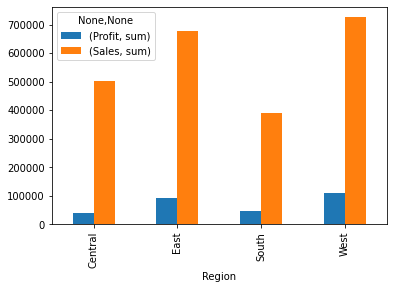

In [15]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()

From the above bar graph we can conclude that east and the west have high sales and profits while south and central have relatively low sales and profits.

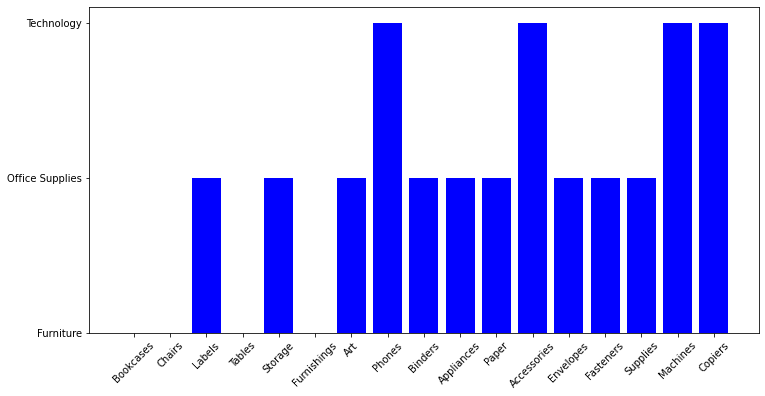

In [16]:
# THIS BAR GRAPH WILL SHOW THE DISTRIBUTION OF SUB-CATEGORIES WRT CATEGORY
plt.figure(figsize=(12,6))
plt.bar('Sub-Category','Category',data=df,color='Blue')
plt.xticks(rotation=45)
plt.title('')
plt.show()

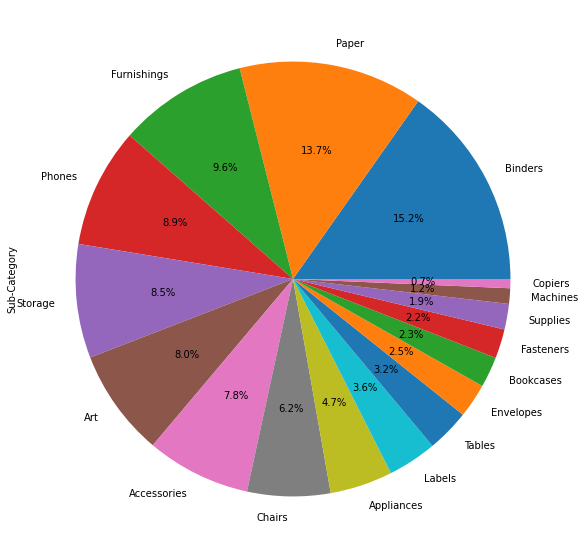

In [17]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

From the above pie chart we can see that copiers,Machines,supplies, etc, were the least popular products, while Binders and papers were the most popular.

Text(0.5, 1.0, 'Total Profit and Sales per Sub-Category')

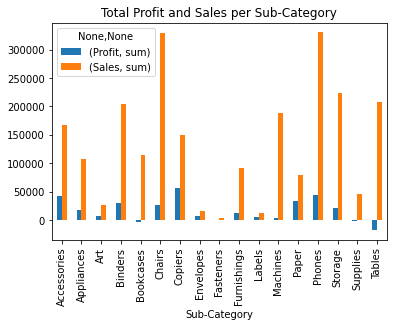

In [18]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')

Tables, Supplies and Bookcases have decent sales relative to other products, but have a loss. 

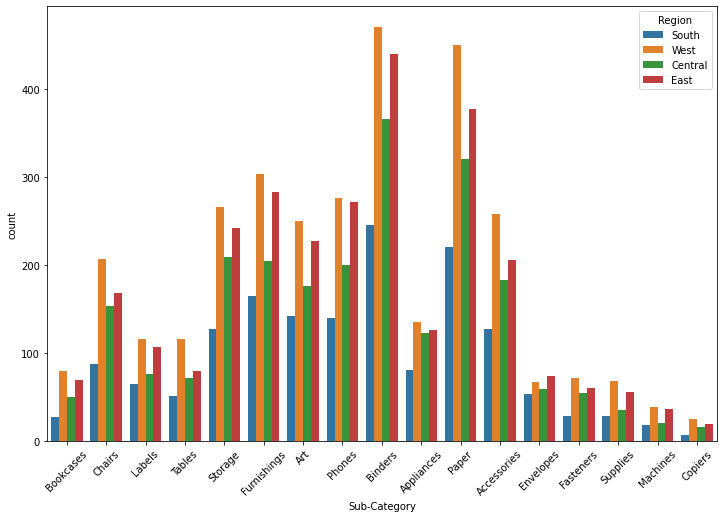

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.xticks(rotation = 45)
plt.show()

  We can see that Binders and Papers are a popular product. Also all products are popular in the west and less popular in the south. Number of products sold in the west are higher

In [21]:
df3 = df.groupby('Sub-Category')['Profit','Sales', 'Cost'].agg(['sum'])
df3

,Profit,Sales,Cost
,sum,sum,sum
Sub-Category,,,
Accessories,41936.78,167380.31,125443.53
Appliances,18137.99,107532.14,89394.15
Art,6527.84,27118.80,20590.96
Binders,30221.48,203412.68,173191.20
Bookcases,-3472.59,114879.98,118352.57
Chairs,26590.08,328449.10,301859.02
Copiers,55617.88,149528.01,93910.13
Envelopes,6964.06,16476.38,9512.32


In [23]:
# PS-Ratio is Profit to Sales Ratio
# PC-Ratio is Profit to Cost Ratio
df3['PS-Ratio'] = df3.iloc[:, 0] / df3.iloc[:,1]
df3['PC-Ratio'] = df3.iloc[:, 0] / df3.iloc[:,2]
df3['PS-Ratio'].sort_values(ascending = False)

Sub-Category
Labels         0.444181
Paper          0.433912
Envelopes      0.422669
Copiers        0.371956
Fasteners      0.313969
Accessories    0.250548
Art            0.240713
Appliances     0.168675
Binders        0.148572
Furnishings    0.142404
Phones         0.134894
Storage        0.095061
Chairs         0.080956
Machines       0.017886
Supplies      -0.025477
Bookcases     -0.030228
Tables        -0.085645
Name: PS-Ratio, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Though Binders were the most sold item, Labels and Paper has a higher Profits to sales and profit too Cost Ratio. 

**FROM ALL THE DATA GATHERED, WE CAN CONCLUDE THAT FACTORING IN THIS DATA AND MAKING IMPROVEMENTS TO BEST FIT WHERE AND HOW THE PRODUCTS NEED TO BE SALE PROFITS CAN MOST LIKELY INCREASE**